PROJECT TITLE: WINE QUALITY

PROJECT GOAL : TO MAKE CLASSIFICATION MODEL TO PREDICT WINE QUALITY

STEP 1 : IMPORT ALL LIBRARIES REQUIRED TO PERFORM ON DATASET

In [30]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import pearsonr
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

STEP 2 : CHECK DATA HEAD, INFO, DESCRIPTION TO UNDERSTAND DATASET STATATICALLY

In [2]:
df = pd.read_csv('winequality.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

In [4]:
df.isnull().sum()

#NO NULL VALUES IN DATASET SO WE NOT NEED TO WORK ON IT

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df.info()

#ALL COLUMN ARE EITHER FLOAT64 OR INT64 SO NO OBJECTIVE COLUMN IN DATASET

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.corr()

#HERE, WE CAN SEE THAT THERE ARE MANY PARAMETERS BUT MOST OF HAVE VERY LOW CORRELATION WITH WINE QUALITY, WE WILL WORK ON IT.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [7]:
print("Quality Range:",df['quality'].unique())

Quality Range: [5 6 7 4 8 3]


In [8]:
print(df['quality'].value_counts())

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


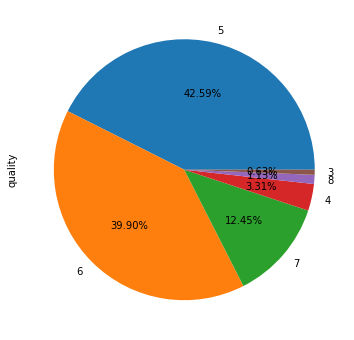

In [9]:
plt.figure(1, figsize=(6,6))
df['quality'].value_counts().plot.pie(autopct="%1.2f%%")

IndexError: ignored

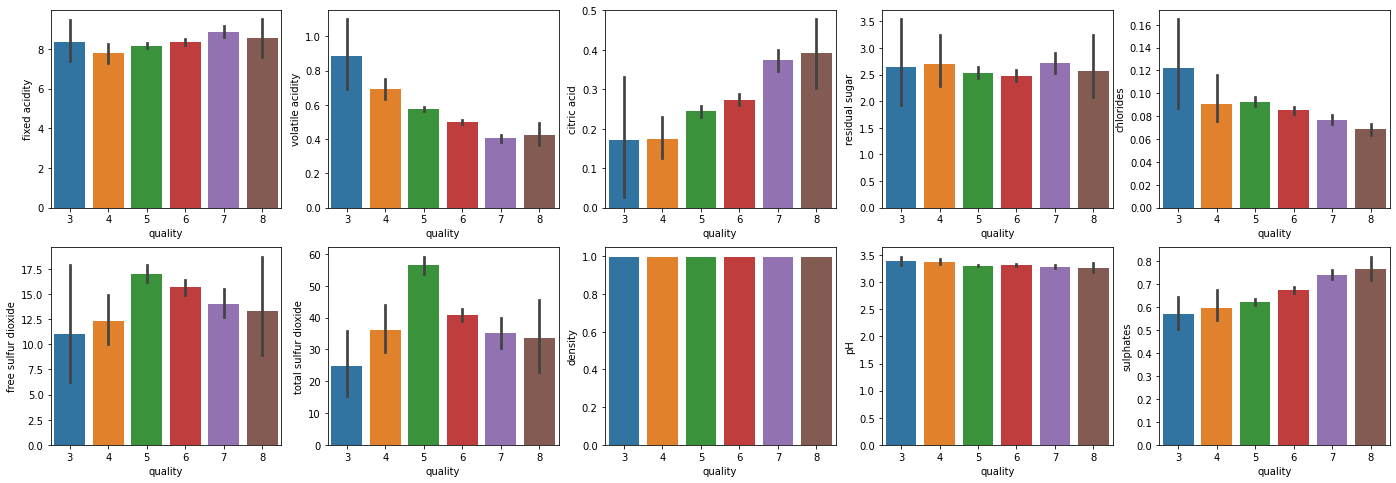

In [11]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(24, 8))
ax = ax.flatten()
index=0
for i in df.columns:
  if i != 'quality':
    sns.barplot(x='quality', y=i, data=df, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.4)
plt.show

#conclusion
#As Volatile Acidity increase - quality of wine - DECREASE
#Citric acid is a import to increase quality of wine
#Sulphates is a import to increase quality of wine
#chloride level should be low for better wine quality
#Features fixed acidity and residual sugar might not give any specification to classify/predict the quality.

In [12]:
#as discussed in datset let we define wine quality in two sets of 'Good' Quality and 'Bad' QUality. above 6.5 is good quality and below 6.5 is consider as BAD quality

bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [13]:
#now we have two quality and both are in OBJECTIV dtype so we will encode it for process

label_quality = LabelEncoder()

In [14]:
df['quality'] = label_quality.fit_transform(df['quality'])

In [15]:

df['quality'].value_counts()

# we have 1382 bad quality wine and 217 good quality wine

0    1382
1     217
Name: quality, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


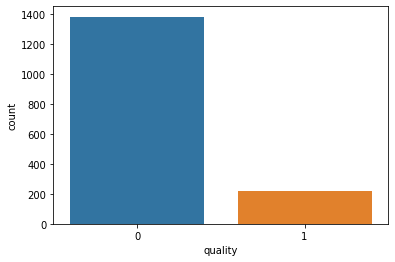

In [16]:
sns.countplot(df['quality'])

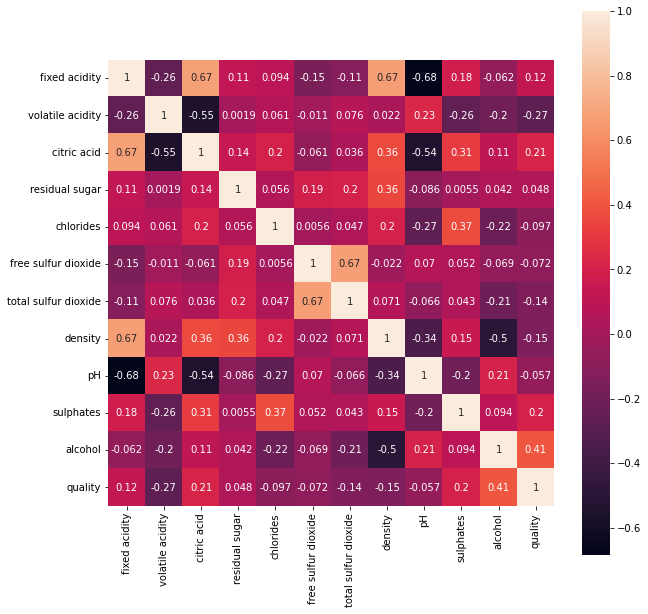

Correlation of different features of our dataset with quality:
fixed acidity : 0.1201
volatile acidity : -0.2707
citric acid : 0.2147
residual sugar : 0.0478
chlorides : -0.0973
free sulfur dioxide : -0.0717
total sulfur dioxide : -0.1395
density : -0.1505
pH : -0.0573
sulphates : 0.1995
alcohol : 0.4073
quality : 1.0000


In [17]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(method='pearson'), annot=True, square=True)
plt.show()

print('Correlation of different features of our dataset with quality:')
for i in df.columns:
  corr, _ = pearsonr(df[i], df['quality'])
  print('%s : %.4f' %(i,corr))

In [18]:
df.drop(['fixed acidity'], axis = 1, inplace = True)
df.drop(['residual sugar'], axis = 1, inplace = True)

In [19]:
df.skew()

volatile acidity        0.671593
citric acid             0.318337
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 2.129363
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


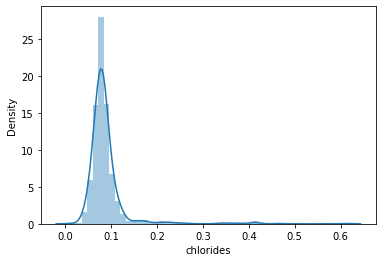

In [20]:
sns.distplot(df['chlorides'])
#Right skewed


In [21]:
from scipy.stats import zscore
di=df.select_dtypes('float')
z_score=zscore(di)
print(di.shape)
df_1=df.loc[(z_score<3).all(axis=1)]
print(df_1.shape) 

(1599, 9)
(1488, 10)


In [22]:



from scipy.stats import boxcox
for col in di:
    if df_1[col].skew()>=.6:
        df_1[col]=np.cbrt(df[col]) ## For Right skewed data we use log,square root,cube root transformation
    if df_1[col].skew()<=-.6:
        df_1[col]=np.power(df_1[col],2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [23]:
df_1.skew()

volatile acidity        0.385650
citric acid             0.299972
chlorides               0.731995
free sulfur dioxide     0.121090
total sulfur dioxide    0.328932
density                -0.042401
pH                      0.062989
sulphates               0.505150
alcohol                 0.640476
quality                 2.095911
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


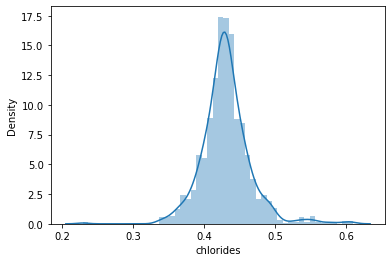

In [24]:
sns.distplot(df_1['chlorides'])
#Right skewed

In [25]:
x = df.drop('quality', axis = 1)
y = df['quality']

#drop Quality column from data

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)
x_train.head()

,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
158,0.680,0.00,0.073,12.0,22.0,0.99690,3.48,0.50,9.3
13,0.610,0.29,0.114,9.0,29.0,0.99740,3.26,1.56,9.1
103,0.575,0.22,0.077,12.0,65.0,0.99670,3.29,0.51,9.2
1160,0.360,0.57,0.087,6.0,20.0,0.99676,3.14,0.72,11.1
1118,0.390,0.12,0.065,14.0,24.0,0.99252,3.30,0.53,13.3


In [27]:
#import standardscaler to treat all data on scaled    
sc = StandardScaler()

In [28]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

#fit the x_train and X_test

In [41]:
svc=SVC()
svcp=SVC(kernel='poly')
svcl=SVC(kernel='linear')
dtc=DecisionTreeClassifier(criterion='entropy',splitter='best',max_features='sqrt')
gb = GaussianNB()
knn=KNeighborsClassifier(n_neighbors=5)
lg=LogisticRegression()


In [42]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV

In [43]:
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print('Score',f.score(x_train,y_train))
    print('Accuracy Score\n',accuracy_score(y_test,pred))
    print('Confusion Matrix\n',confusion_matrix(y_test,pred))
    print('Classification Report',classification_report(y_test,pred))
    print('f1_score',f1_score(y_test,pred))

In [44]:
fun(svc)

Score 0.8982485404503753
Accuracy Score
 0.8775
Confusion Matrix
 [[343   5]
 [ 44   8]]
Classification Report               precision    recall  f1-score   support

           0       0.89      0.99      0.93       348
           1       0.62      0.15      0.25        52

    accuracy                           0.88       400
   macro avg       0.75      0.57      0.59       400
weighted avg       0.85      0.88      0.84       400

f1_score 0.24615384615384617


In [45]:
fun(dtc)

Score 1.0
Accuracy Score
 0.855
Confusion Matrix
 [[317  31]
 [ 27  25]]
Classification Report               precision    recall  f1-score   support

           0       0.92      0.91      0.92       348
           1       0.45      0.48      0.46        52

    accuracy                           0.85       400
   macro avg       0.68      0.70      0.69       400
weighted avg       0.86      0.85      0.86       400

f1_score 0.46296296296296297


In [46]:
fun(knn)

Score 0.9107589658048374
Accuracy Score
 0.88
Confusion Matrix
 [[335  13]
 [ 35  17]]
Classification Report               precision    recall  f1-score   support

           0       0.91      0.96      0.93       348
           1       0.57      0.33      0.41        52

    accuracy                           0.88       400
   macro avg       0.74      0.64      0.67       400
weighted avg       0.86      0.88      0.87       400

f1_score 0.41463414634146345


In [47]:
fun(svcp)

Score 0.9040867389491243
Accuracy Score
 0.875
Confusion Matrix
 [[339   9]
 [ 41  11]]
Classification Report               precision    recall  f1-score   support

           0       0.89      0.97      0.93       348
           1       0.55      0.21      0.31        52

    accuracy                           0.88       400
   macro avg       0.72      0.59      0.62       400
weighted avg       0.85      0.88      0.85       400

f1_score 0.3055555555555555


In [48]:
fun(lg)

Score 0.8840700583819849
Accuracy Score
 0.8725
Confusion Matrix
 [[338  10]
 [ 41  11]]
Classification Report               precision    recall  f1-score   support

           0       0.89      0.97      0.93       348
           1       0.52      0.21      0.30        52

    accuracy                           0.87       400
   macro avg       0.71      0.59      0.62       400
weighted avg       0.84      0.87      0.85       400

f1_score 0.3013698630136986


In [49]:
rfc=RandomForestClassifier(n_estimators=50,random_state=42)

In [50]:
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
print('Score',rfc.score(x_train,y_train))
print('Accuracy Score\n',accuracy_score(y_test,pred))
print('Confusion Matrix\n',confusion_matrix(y_test,pred))
print('Classification Report',classification_report(y_test,pred))
print("f1 score",f1_score(y_test,pred))

Score 0.9983319432860718
Accuracy Score
 0.9
Confusion Matrix
 [[343   5]
 [ 35  17]]
Classification Report               precision    recall  f1-score   support

           0       0.91      0.99      0.94       348
           1       0.77      0.33      0.46        52

    accuracy                           0.90       400
   macro avg       0.84      0.66      0.70       400
weighted avg       0.89      0.90      0.88       400

f1 score 0.45945945945945943


In [51]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

In [52]:
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print('Score',ad.score(x_train,y_train))
print('Accuracy Score\n',accuracy_score(y_test,predad))
print('Confusion Matrix\n',confusion_matrix(y_test,predad))
print('Classification Report',classification_report(y_test,predad))
print("f1 score",f1_score(y_test,pred))

Score 0.9040867389491243
Accuracy Score
 0.8725
Confusion Matrix
 [[334  14]
 [ 37  15]]
Classification Report               precision    recall  f1-score   support

           0       0.90      0.96      0.93       348
           1       0.52      0.29      0.37        52

    accuracy                           0.87       400
   macro avg       0.71      0.62      0.65       400
weighted avg       0.85      0.87      0.86       400

f1 score 0.45945945945945943


In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [54]:
score=cross_val_score(svc,x,y,cv=10)
print(score.mean())

0.8642924528301886


In [55]:
score=cross_val_score(svcp,x,y,cv=10)
print(score.mean())

0.8642924528301886


In [56]:
score=cross_val_score(svcp,x,y,cv=10)
print(score.mean())

0.8642924528301886


In [57]:
score=cross_val_score(dtc,x,y,cv=10)
print(score.mean())

0.8242452830188679


In [58]:
score=cross_val_score(knn,x,y,cv=14)
print(score.mean())

0.8529911735861393


In [59]:
score=cross_val_score(rfc,x,y,cv=14)
print(score.mean())

0.8811703170970906


In [60]:
score=cross_val_score(lg,x,y,cv=10)
print(score.mean())

0.871800314465409


In [61]:
score=cross_val_score(ad,x,y,cv=10)
print(score.mean())

0.8549331761006288


In [65]:
#Here, i am going to select RFC as our best fit model based on CV score and accuracy score

In [66]:
import pickle
filename='winequality.pkl'
pickle.dump(rfc,open(filename,'wb'))

      Actual  Predict
1312       0        0
54         0        0
108        0        0
586        1        0
200        1        0
...      ...      ...
996        1        0
976        0        0
617        0        0
690        0        0
660        0        0

[400 rows x 2 columns]


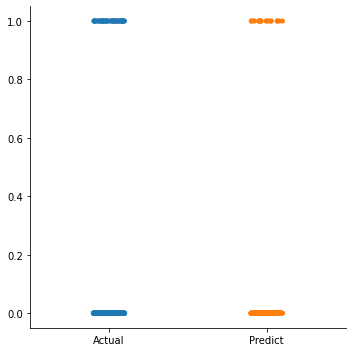

In [67]:
res=pd.DataFrame()
res['Actual']=y_test
res['Predict']=rfc.predict(x_test)

print(res)
sns.catplot(data=res)